Pima Indians Diabetes Classification

sklearn 결정 트리를 이용한 분류

데이터 셋 출처
- [Pima Indians Diabetes Database | Kaggle] https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

## 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## Data Load

In [2]:
df_pima = pd.read_csv("http://bit.ly/data-diabetes-csv")

## EDA

In [3]:
df_pima.shape

(768, 9)

In [4]:
df_pima.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
158,2,88,74,19,53,29.0,0.229,22,0
374,2,122,52,43,158,36.2,0.816,28,0
557,8,110,76,0,0,27.8,0.237,58,0
141,5,106,82,30,0,39.5,0.286,38,0
734,2,105,75,0,0,23.3,0.560,53,0


In [5]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


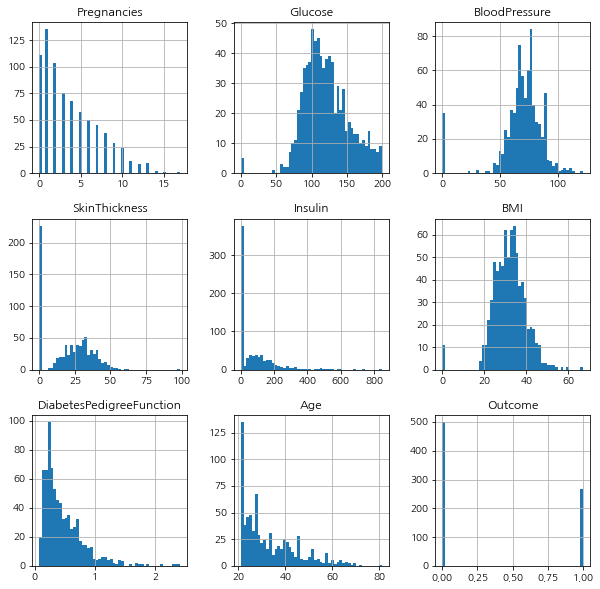

In [6]:
df_pima.hist(bins = 50, figsize = (10,10));

In [7]:
# 9개의 열을 가진 768개의 데이터
# 데이터 프레임의 컬럼 정보를 리스트 형태로 변환해 출력해주세요

df_pima_col = df_pima.columns.to_list()
df_pima_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 기본적인 학습

히스토그램을 보면, SkinThickness와 Insulin, BMI에 이상치가 있다는 사실을 확인 할 수 있지만,
일단 전처리를 하지 않은 상태에서 모델 성능 평가를해보고, 이후 하이퍼파라미터 튜닝을 진행하며 차이를 살펴 볼 예정

지도 학습의 경우 기본적으로 문제의 답을 알려줘야하는데, 해당 데이터 셋에서는 Outcome이 답에 해당함

Note!
하이퍼파라미터와 파라미터는 다름
| | Hyperparameter | Parameter | | :---: | :---: | :---: | | 설명 | 모델 학습 과정에 반영되는 값 | 모델 내부에서 결정되는 변수 | | | 학습 전에 조절해야 됨 | 학습 또는 예측되는 값 | | 예시 | 학습률 | 평균, 표준편차 | | | 손실함수 | 회귀 계수 | | | 배치 사이즈 | 가중치, 편향 | | 조정 여부 | 가능 | 불가 |

하이퍼파라미터의 튜닝 방법은 굉장히 많음

### 데이터 셋 나누기

#### 학습용 데이터와 테스트용 데이터 개수 나누기

In [8]:
split_count = int(df_pima.shape[0] * 0.8)
split_count

614

#### 학습용 데이터 셋과 테스트용 데이터 셋 생성하기

In [9]:
# train set과 test set을 인덱싱을 이용해 나눠보세요!

train = df_pima[:split_count]
test = df_pima[split_count:]

print(" train:", train.shape, "\n", "test:", test.shape)

 train: (614, 9) 
 test: (154, 9)


####  문제와 정답 컬럼 구분하기

In [10]:
feature_names = df_pima_col
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
label_name = "Outcome"
label_name

'Outcome'

#### 학습용/테스트용 데이터 셋에 대한 문제와 정답 데이터 셋 생성하기

In [12]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]

print(" X_train:", X_train.shape, "\n",
      "y_train:", y_train.shape,"\n",
      "X_test: ", X_test.shape, "\n",
      "y_test: ", y_test.shape)

 X_train: (614, 8) 
 y_train: (614,) 
 X_test:  (154, 8) 
 y_test:  (154,)


#### 사이킷런에 구현된 함수로 구해보기

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_pima[feature_names], df_pima[label_name],test_size = 0.2, train_size = 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 머신러닝 알고리즘 사용

#### decision tree 

In [14]:
# 사이킷런 DT 알고리즘 불러오기
from sklearn.tree import DecisionTreeClassifier

In [15]:
# 학습시키기
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# 예측하기
y_predict = model.predict(X_test)

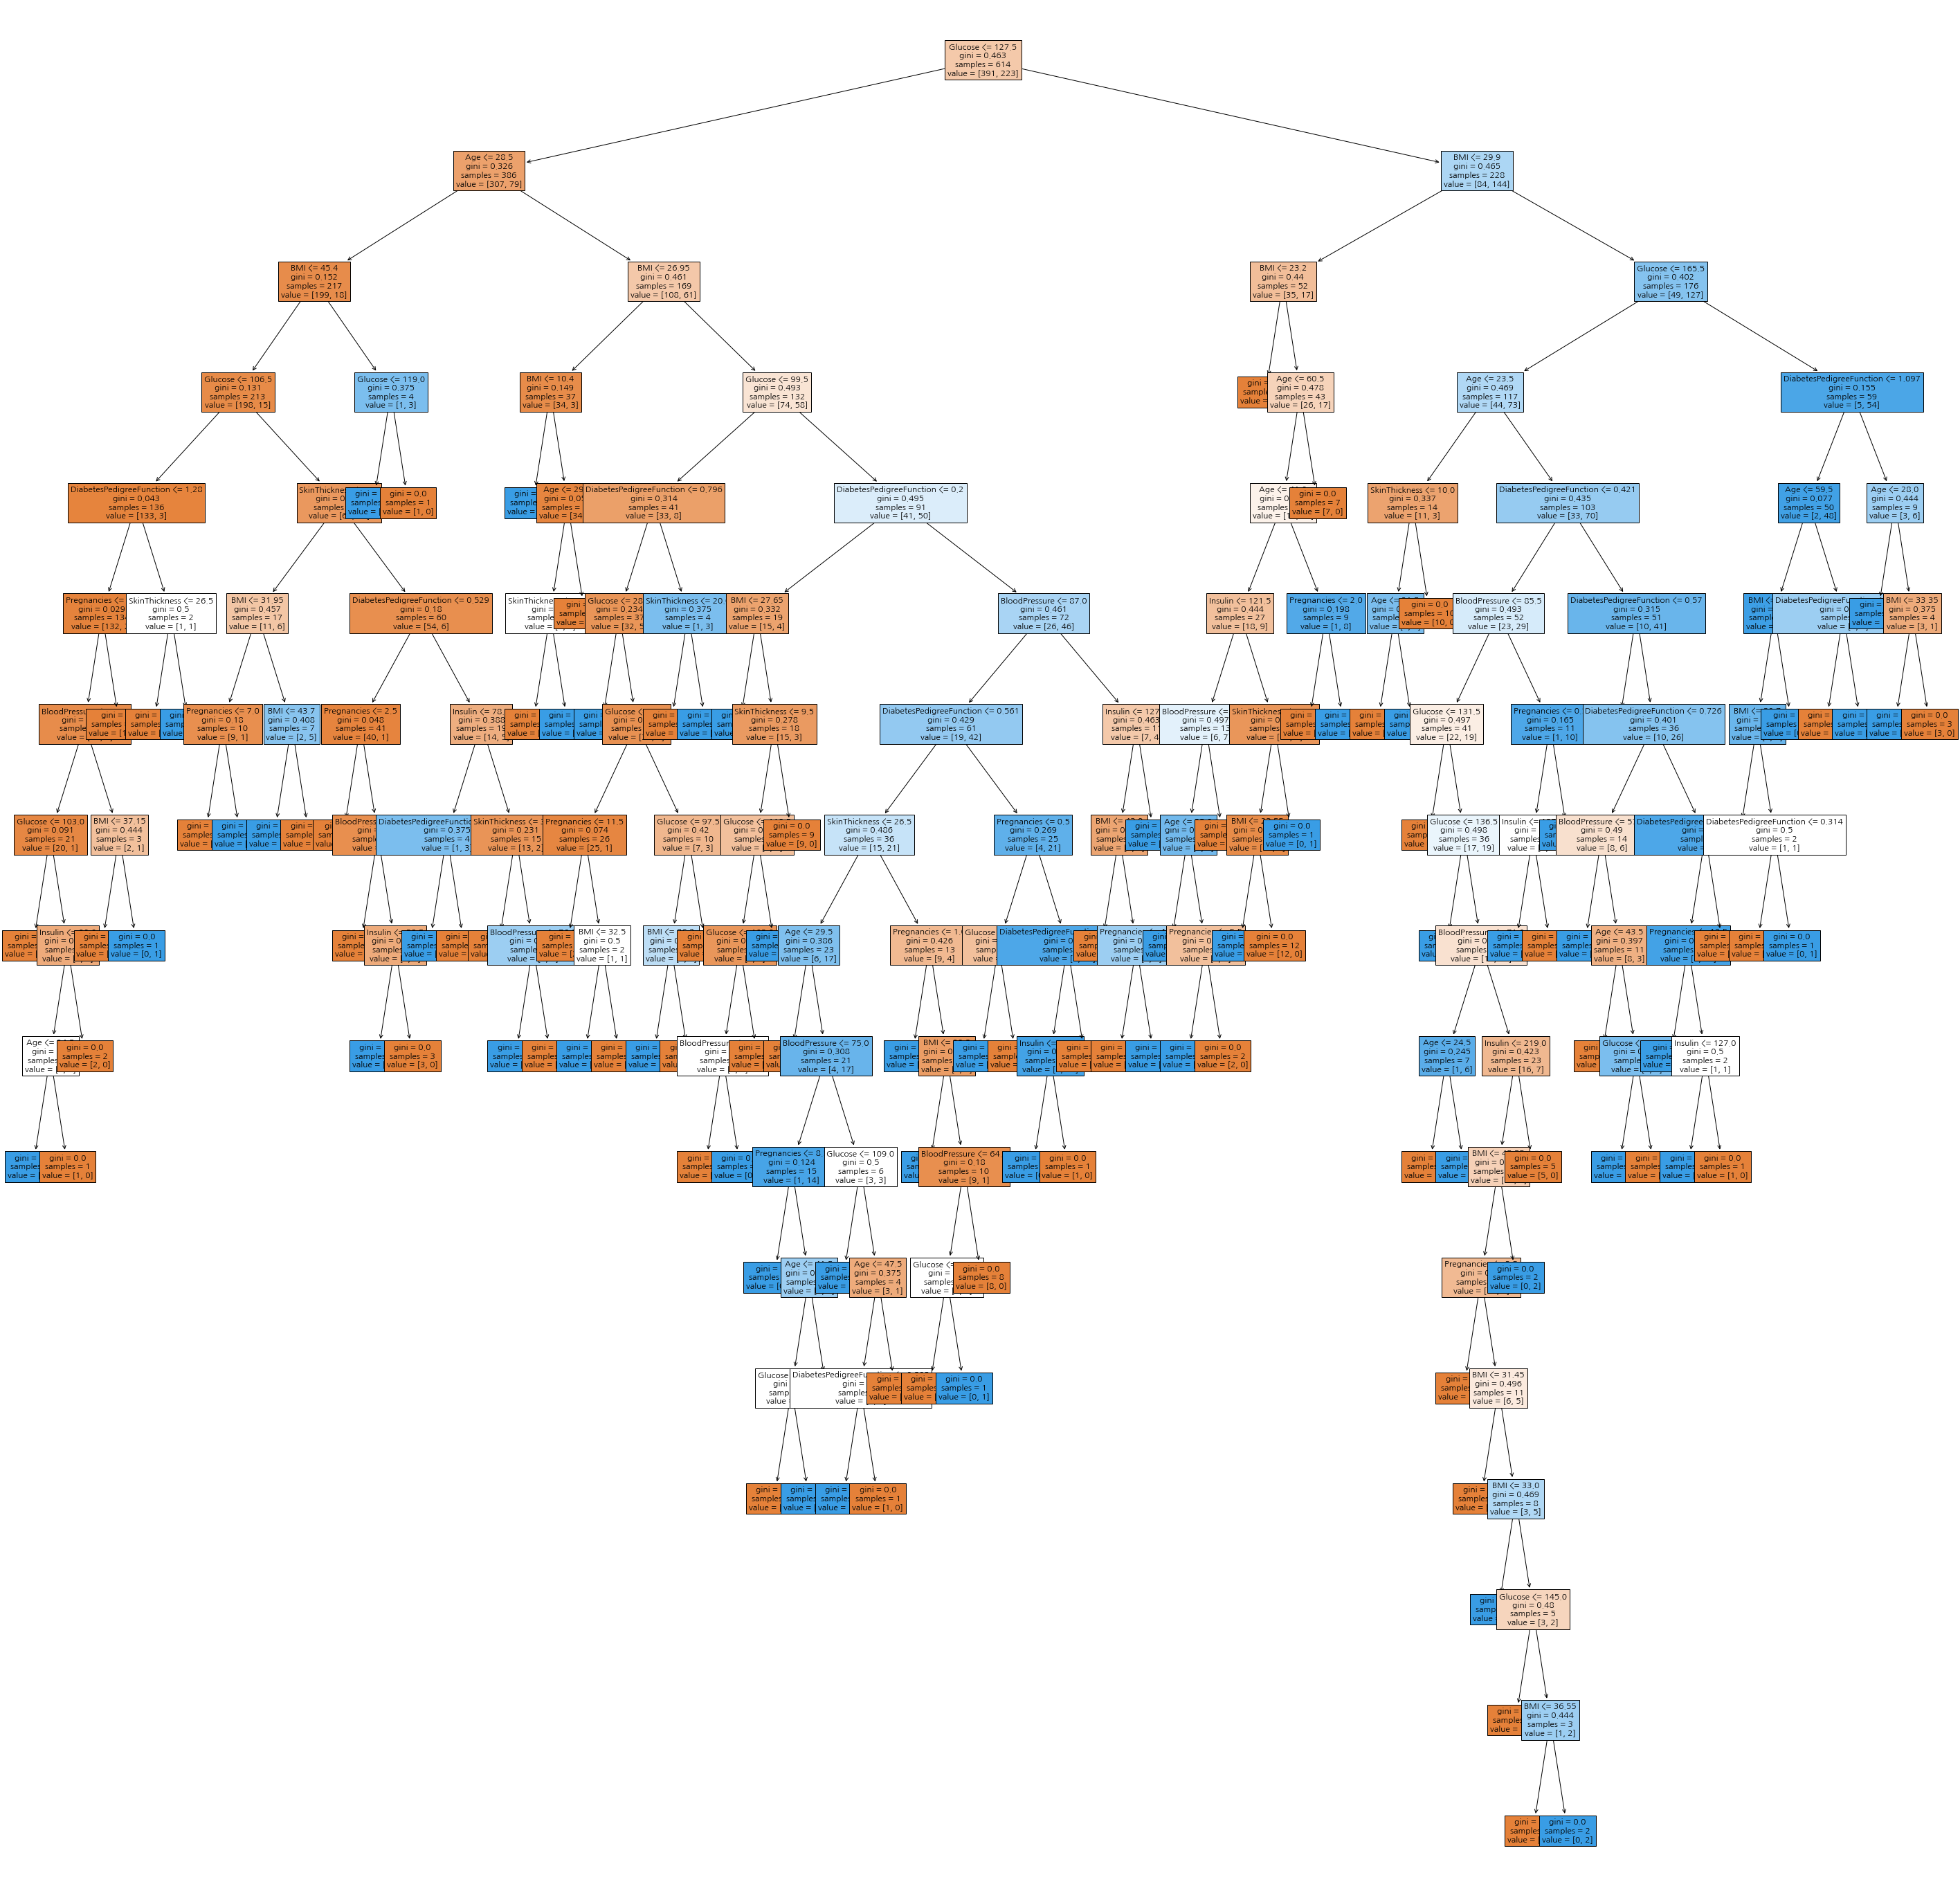

In [17]:
# 트리 알고리즘 분석
plt.figure(figsize = (50,50))
plot_tree(model, feature_names= feature_names, filled = True, fontsize = 12)
plt.show()

지니 계수가 0이되면 트리 생성을 제한하는데, 파라미터 튜닝을 진행하지 않은 상황에서는 16개의 Leaf node가 존재함
그래프가 크므로 상위 4개 노드만 그려보면, 

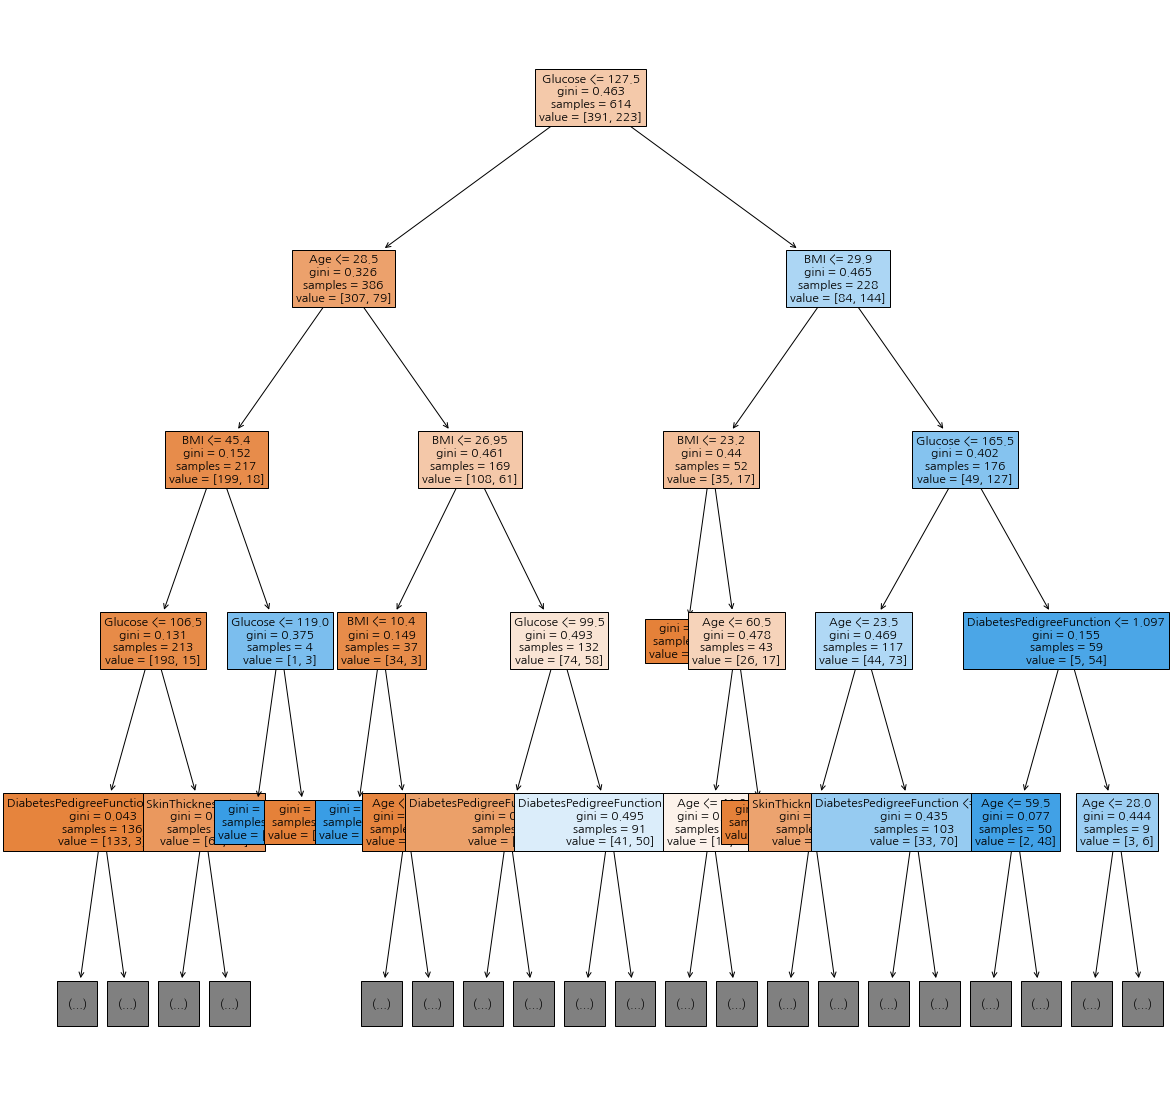

In [18]:
# 상위 4개 노드만 출력
plt.figure(figsize = (20,20))
plot_tree(model, max_depth = 4,feature_names= feature_names, filled = True, fontsize = 12)
plt.show()

결정 트리의 최상위에 Glucose가 온 것을 확인 할 수 있음
결정 트리의 최상단에는 가장 중요한 feature가 옴

## 특성(feature)의 중요도 추출하기

In [19]:
model.feature_importances_

array([0.05381783, 0.31705817, 0.07044694, 0.05709899, 0.04781338,
       0.19395163, 0.10884612, 0.15096693])

In [20]:
sum(model.feature_importances_)

0.9999999999999999

<AxesSubplot:>

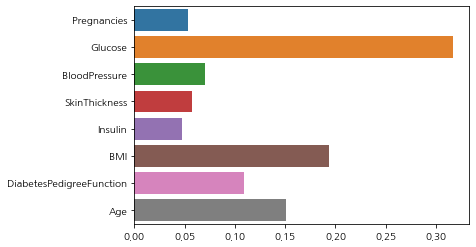

In [21]:
sns.barplot(x=model.feature_importances_, y = model.feature_names_in_)

## 성능평가

In [22]:
# 사이킷런에 구현된 기능을 사용하지 않고 직접 정확도 구하기
(y_test == y_predict).mean()

0.6233766233766234

In [23]:
# 사이킷런에 구현된 기능 사용하기
accuracy_score(y_test, y_predict)

0.6233766233766234

In [24]:
# 모델에서 score를 호출하여 구하기
model.score(X_test, y_test)

0.6233766233766234

## 결정 트리 모델의 하이퍼파라미터 조절 
모델을 생성 할 때, 기본적으로 주어지는 피처의 개수나 최대 높이를 제한해 모델을 생성하고 성능을 평가해봄

In [25]:
# 결정 트리 모델의 최대 높이를 4로 제한하고, 고려하는 특성의 비율도 0.8로 조절해서 모델을 생성
# 학습과 예측까지 진행 해보세요!
# 예측값을 y_pre_max4라는 변수에 지정하면 이후 실습에서 코드를 수정하지 않아도 됩니다

In [26]:
model = DecisionTreeClassifier(max_depth= 4, max_features= 0.8, random_state=42)

In [27]:
# 학습(훈련)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [28]:
# 예측
y_pre_max4 = model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pre_max4)

0.7272727272727273

## Feature Engineering
- Garbage In - Garbage Out, 잘 전처리된 데이터를 사용하면 좋은 성능이 나온다는 의미
- 실제로 모델을 생성하기 이전에 EDA를 통해, 데이터를 분석하고 전처리하는 과정이 중요함

- 수치형 변수를 범주형 변수로 만들기
- 먼저, 임신 횟수를 히스토그램으로 나타내 봅니다

<AxesSubplot:>

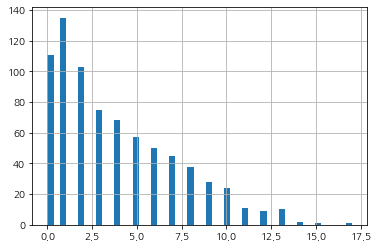

In [30]:
df_pima["Pregnancies"].hist(bins = 50)

임신 횟수를 당뇨병 여부를 기준으로 나타내 봅니다

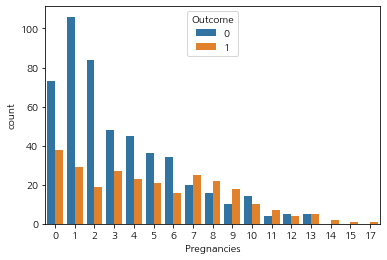

In [31]:
sns.countplot(data = df_pima, x = "Pregnancies", hue = "Outcome");

Pima 인디언 데이터 셋에서 Pregnancies의 경우 3회 미만인 경우가 대부분임
0 ~ 17까지 수치형 범주지만, 범주형 변주로 바꾸는 피쳐 엔지니어링을 진행함 -> 임신 횟수 6회를 기준으로 범주형으로 전환

In [32]:
df_pima["Pregnancies_high"] = df_pima["Pregnancies"] > 6
df_pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


In [33]:
df_pima_col2 = df_pima.columns.to_list()
df_pima_col2

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high']

In [34]:
feature_name = df_pima_col2
feature_name.remove("Pregnancies")
feature_name.remove("Outcome")
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [35]:
train = df_pima[:split_count]
test = df_pima[split_count:]

In [36]:
X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]
y_test = test[label_name]

print(" X_train:", X_train.shape, "\n",
      "y_train:", y_train.shape,"\n",
      "X_test: ", X_test.shape, "\n",
      "y_test: ", y_test.shape)

 X_train: (614, 8) 
 y_train: (614,) 
 X_test:  (154, 8) 
 y_test:  (154,)


In [37]:
model = DecisionTreeClassifier(max_depth= 4, max_features= 0.8, random_state=42)

In [38]:
# 학습(훈련)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [39]:
# 예측
y_pre_max4_Pre_high = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pre_max4_Pre_high)

0.7727272727272727

같은 모델에서, 하나의 특성만 수치형에서 범주형으로 변경했는데 3점 정도의 성능 향상이 있었음

## 결측치 처리하기

<AxesSubplot:>

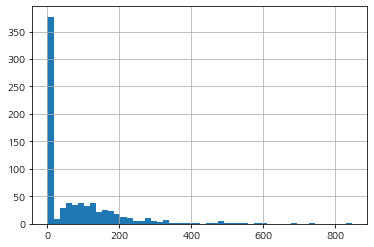

In [41]:
df_pima["Insulin"].hist(bins = 50)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

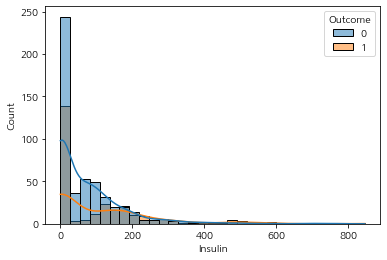

In [42]:
sns.histplot(data = df_pima, x = "Insulin", kde = True, hue = "Outcome")

Insulin 항목에서 약 48%의 결측치가 존재함
결측치를 해결하는 방법은 여러가지가 존재하지만, 

중앙값으로 대체하는 방식과 평균값으로 보완 두 가지 방식으로 진행

In [43]:
df_pima.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


### 중앙값으로 대체 

In [44]:
df_pima_med = df_pima.groupby("Outcome")["Insulin"].median()
df_pima_med

Outcome
0    39.0
1     0.0
Name: Insulin, dtype: float64

In [45]:
df_pima["Insulin_filled_med"] = df_pima["Insulin"]
df_pima.loc[(df_pima["Outcome"] == 0) & (df_pima["Insulin"] == 0), "Insulin_filled_med"] = df_pima_med[0]
df_pima.loc[(df_pima["Outcome"] == 1) & (df_pima["Insulin"] == 0), "Insulin_filled_med"] = df_pima_med[1]
df_pima[["Outcome", "Insulin", "Insulin_filled_med"]]

,Outcome,Insulin,Insulin_filled_med
0,1,0,0
1,0,0,39
2,1,0,0
3,0,94,94
4,1,168,168
...,...,...,...
763,0,180,180
764,0,0,39
765,0,112,112
766,1,0,0


In [46]:
df_pima["Insulin_filled_med"].isnull().sum().sum()

0

In [47]:
df_pima_col3 = df_pima.columns.to_list()
df_pima_col3

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Insulin_filled_med']

In [48]:
feature_name = df_pima_col3
feature_name.remove("Pregnancies")
feature_name.remove("Insulin")
feature_name.remove("Outcome")
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled_med']

In [49]:
train = df_pima[:split_count]
test = df_pima[split_count:]

X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]
y_test = test[label_name]

print(" X_train:", X_train.shape, "\n",
      "y_train:", y_train.shape,"\n",
      "X_test: ", X_test.shape, "\n",
      "y_test: ", y_test.shape)

 X_train: (614, 8) 
 y_train: (614,) 
 X_test:  (154, 8) 
 y_test:  (154,)


In [50]:
model = DecisionTreeClassifier(max_depth= 4, max_features= 0.8, random_state=42)

In [51]:
# 학습(훈련)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [52]:
# 예측
y_pre_max4_50_per = model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pre_max4_50_per)

0.8896103896103896

### 평균값으로 대체

In [54]:
df_pima_mean = df_pima.groupby("Outcome")["Insulin"].mean()
df_pima_mean

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

In [55]:
df_pima["Insulin_filled_mean"] = df_pima["Insulin"]
df_pima.loc[(df_pima["Outcome"] == 0) & (df_pima["Insulin"] == 0), "Insulin_filled_mean"] = df_pima_mean[0]
df_pima.loc[(df_pima["Outcome"] == 1) & (df_pima["Insulin"] == 0), "Insulin_filled_mean"] = df_pima_mean[1]
df_pima[["Outcome", "Insulin", "Insulin_filled_mean"]]

,Outcome,Insulin,Insulin_filled_mean
0,1,0,100.335821
1,0,0,68.792000
2,1,0,100.335821
3,0,94,94.000000
4,1,168,168.000000
...,...,...,...
763,0,180,180.000000
764,0,0,68.792000
765,0,112,112.000000
766,1,0,100.335821


In [56]:
df_pima_col4 = df_pima.columns.to_list()
df_pima_col4

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Insulin_filled_med',
 'Insulin_filled_mean']

In [57]:
feature_name = df_pima_col4
feature_name.remove("Pregnancies")
feature_name.remove("Insulin")
feature_name.remove("Insulin_filled_med")
feature_name.remove("Outcome")
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled_mean']

In [59]:
train = df_pima[:split_count]
test = df_pima[split_count:]

X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]
y_test = test[label_name]

In [60]:
model = DecisionTreeClassifier(max_depth= 4, max_features= 0.8, random_state=42)

In [61]:
# 학습(훈련)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [62]:
# 예측
y_pre_max4_mean = model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pre_max4_mean)

0.8506493506493507

## 이상치

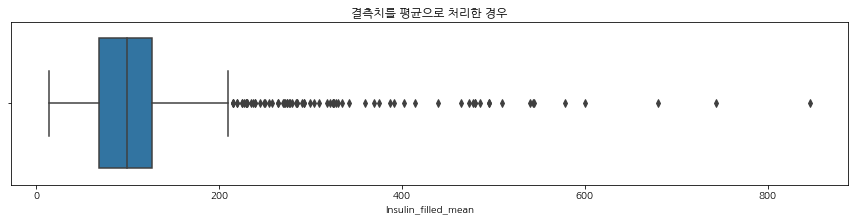

In [66]:
plt.figure(figsize = (15,3))
sns.boxplot(x = df_pima["Insulin_filled_mean"]).set_title("결측치를 평균으로 처리한 경우");

In [69]:
df_pima["Insulin_filled_mean"].describe()

count    768.000000
mean     118.967780
std       93.557899
min       14.000000
25%       68.792000
50%      100.000000
75%      127.250000
max      846.000000
Name: Insulin_filled_mean, dtype: float64

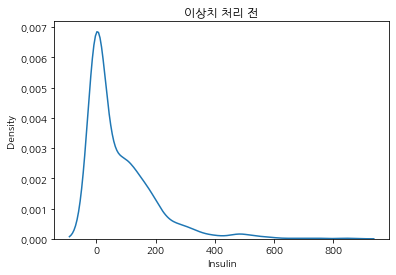

In [70]:
sns.kdeplot(x = df_pima["Insulin"]).set_title("이상치 처리 전");

In [165]:
df_pima["Insulin_outlier_filled"] = df_pima["Insulin_filled_mean"]
df_pima.loc[(df_pima["Insulin_filled_mean"] > df_pima["Insulin_filled_mean"].quantile(0.75)),"Insulin_outlier_filled"] = 100

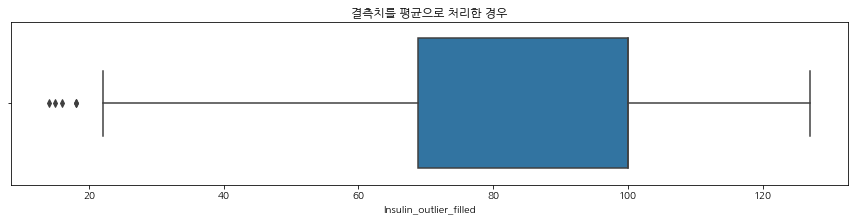

In [166]:
plt.figure(figsize = (15,3))
sns.boxplot(x = df_pima["Insulin_outlier_filled"]).set_title("결측치를 평균으로 처리한 경우");

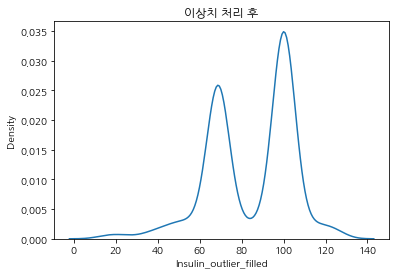

In [167]:
sns.kdeplot(x = df_pima["Insulin_outlier_filled"]).set_title("이상치 처리 후");

In [179]:
df_pima_col5 = df_pima.columns.to_list()
df_pima_col5

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Insulin_filled_med',
 'Insulin_filled_mean',
 'Insulin_outlier_filled']

In [180]:
feature_name = df_pima_col5
feature_name.remove("Pregnancies")
feature_name.remove("Outcome")
feature_name.remove("Insulin")
feature_name.remove("Insulin_filled_mean")
feature_name.remove("Insulin_filled_med")
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_outlier_filled']

In [181]:
train = df_pima[:split_count]
test = df_pima[split_count:]

X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]
y_test = test[label_name]

print(" X_train:", X_train.shape, "\n",
      "y_train:", y_train.shape,"\n",
      "X_test: ", X_test.shape, "\n",
      "y_test: ", y_test.shape)

 X_train: (614, 8) 
 y_train: (614,) 
 X_test:  (154, 8) 
 y_test:  (154,)


In [182]:
model = DecisionTreeClassifier(max_depth= 4, max_features= 0.8, random_state=42)

In [183]:
# 학습(훈련)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=42)

In [184]:
# 예측
y_pre_max4_mean_out = model.predict(X_test)

In [185]:
accuracy_score(y_test, y_pre_max4_mean_out)

0.8441558441558441